In [59]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pingouin as pg

# Visualisation données review SVM
&copy; Coralie Joucla, JJ Aucouturier, CNRS, 2021

## Load data and clean up

In [106]:
#data=pd.read_csv('data/review.csv', header=[1], sep=';', encoding='latin-1')
data=pd.read_csv('data/table-review-svm-eeg.csv', header=[1], sep=';', encoding='latin-1')



### Rename columns

In [107]:
# all column names snake case
from stringcase import snakecase
data.columns = map(str.lower, data.columns)
data.columns = map(snakecase, data.columns)

In [108]:
list(data)

['1st_author',
 'country',
 'nb_authors',
 'maths/eng__authors',
 'neuro/med__authors',
 'hybrid_authors',
 'title',
 'journal',
 'impact_factor',
 'pages',
 'volume',
 'issue',
 'year',
 'data_type',
 'task',
 'purpose',
 'number_of_subjects',
 'quantity_of_data_(total_nb_samples/subject)',
 'subject_handling',
 'eeg_setup',
 'number_of_channels_really_used',
 'final_sampling_rate',
 'preprocessing',
 'artifact_handling',
 'features',
 'features_optimisation/selection',
 'kernel',
 'hyperparameters_optimisation',
 'hyperparameters',
 'type_of_cross_validation',
 'data_permutations',
 'train_valid_test_scheme',
 'software',
 'data_normalisation',
 'performance_metrics',
 'best_accuracy_reported',
 'statistical_testing',
 'comparison_of_results',
 'other_classifiers',
 'number_of_equations',
 'dataset',
 'dataset_name',
 'code',
 'supplementary_materials']

In [109]:
data.hyperparameters

0       NS
1       NS
2       NS
3      Yes
4       NS
      ... 
171     NS
172    Yes
173     NS
174     NS
175     NS
Name: hyperparameters, Length: 176, dtype: object

In [110]:
data.rename(columns={'1st_author':'first_author',
                     'country':'country',
                     'maths/eng__authors':'nb_cs_authors',
                     'neuro/med__authors':'nb_neuro_authors',
                     'hybrid_authors':'nb_mixed_authors',
                     'best_accuracy_reported':'accuracy',
                     'journal':'journal',
                     'data_type':'data_type',
                     'type_of_cross_validation':'cross_validation',
                     'hyperparameters_optimisation':'hyper_optimized', 
                     'hyperparameters':'hyper_values',
                     'optimization_hyperparams':'hyper_method',
                     'data_normalisation':'norm_method',
                     'performance_metrics':'performance_metrics',
                     'code':'code_given',
                     'quantity_of_data_(total_nb_samples/subject)': 'nb_samples',
                     'number_of_subjects':'nb_subjects',
                     'subject_handling':'within_between',
                     'preprocessing':'eeg_preprocessing',
                     'artifact_handling':'artifact_handling',
                     'software':'software'},
                inplace=True)

# data.drop(columns=['type_of_journal', #empty
#                   'data_type', #raw, unclassified
#                   'task', #raw, unclassified
#                   'purpose', #raw, unclassified
#                   'quantity_of_data_(total_min_recording/subject)',
#                   'hardware',
#                   'eeg_nets',
#                   'nb_channels',
#                   'sampling_rate',
#                   'data_augmentation',
#                   'features_optimization/selection',
#                   'nb_features',
#                   'svm_type',
#                   'kernel',
#                   'comparison_of_results',
#                   'other_classifiers',
#                   'other_features_selection_methods',
#                   'supplementary_materials'], inplace=True)

### Convert columns to numeric

In [111]:
def convert_col_to_numeric(data, name, rename): 
    
    # replace commas (excel)
    data[name] = [str(x).replace(',', '.') for x in data[name]]
    # rename special values (ex. spurrious strs)
    data[name] = data[name].apply(lambda value: rename[value] if value in rename else value)
    # coerce the rest into num
    data[name] = pd.to_numeric(data[name], errors='coerce')
    return data[name]    

In [112]:
data.accuracy = convert_col_to_numeric(data,'accuracy',rename={'multiclass':pd.NA,
                                                               'multiclass 35.5':pd.NA,
                                                               'non reportée':pd.NA,
                                                               '-':pd.NA,
                                                               'figs':pd.NA,
                                                               'kappa':pd.NA,
                                                               'nan':pd.NA,
                                                               '':pd.NA,
                                                               '0.56':56})
print(data.accuracy.unique())

[ 98.      90.19    88.4     92.      94.79    99.11    72.      64.
  91.125   67.85    82.28    73.14    91.12    99.81    85.      90.
  74.3     85.81   100.      95.64    71.88    88.89    84.      89.45
  69.32    91.4     88.      68.2     65.81    71.2     76.      95.1
  94.4     98.8     86.03    66.98    69.73    77.52    96.4     75.5
  64.4     80.      98.57    94.61    87.88    75.      91.85    98.9
  91.6     88.6     90.2         nan  91.88    86.54    92.91    68.3
  91.9     65.      99.      82.      80.71    96.      94.      87.
  80.7     87.9     93.27    94.9     65.2     74.73    90.25    87.27
  82.5     88.1     85.67    99.86    89.5     92.3     81.23    82.29
  72.5     85.71    88.07    89.17    73.2     97.      56.      96.02
  88.33    95.      88.9     69.34    58.      62.5     81.07    93.16
  95.34    69.5     85.19    97.2     85.2     99.1     81.94    75.9
  76.41    94.11    94.1     86.96    87.64    93.5     80.15    90.63
  74.2     80.19 

In [113]:
data.impact_factor = convert_col_to_numeric(data,'impact_factor',rename={})
data.impact_factor.unique()

array([ 4.387,  1.833,  3.031,  4.551,  4.084,  1.82 ,  2.323,  3.582,
        3.424,  4.217,  4.491,  4.042,  2.785,  2.18 ,  6.507,  2.246,
        5.182,  2.154,  3.24 ,  2.776,  8.222,  2.286,  4.314,  0.96 ,
        1.418,  4.438,  3.614,  2.882,  2.888,  2.415,  5.812,  2.19 ,
       10.387,  4.122,  0.787,  2.643,  3.188,  3.244,  3.478,  1.018,
        4.504,  2.42 ,  0.735,  7.197,  3.574,  1.139,  3.104, 15.071,
        4.5  ,  2.55 ,  2.87 ,  3.648,  3.45 ,  2.627,  1.961,  2.424,
        1.34 ,  2.493,  1.067,  2.197,  1.848,  0.993,  1.935,  2.013,
        1.295,  1.006,  4.428,  4.554,  3.909,  1.587,  2.129,  3.   ,
        5.032])

In [114]:
data['percent_cs_authors'] = 100* data.nb_cs_authors / data.nb_authors
data['percent_cs_authors'] = convert_col_to_numeric(data,'percent_cs_authors',rename={})
data['percent_cs_authors'].unique()

array([ 71.42857143, 100.        ,  66.66666667,  28.57142857,
         0.        ,  75.        ,  50.        ,  11.11111111,
        80.        ,  10.        ,   7.69230769,  42.85714286,
        25.        ,  83.33333333,  60.        ,  85.71428571,
        20.        ,  18.18181818,  33.33333333,  40.        ,
        11.53846154])

## Distribution accuracy vs discipline

In [115]:
data.accuracy.describe()

count    160.000000
mean      85.543477
std       10.213847
min       56.000000
25%       78.876850
50%       87.840000
75%       93.187500
max      100.000000
Name: accuracy, dtype: float64

mean Accuracy:85.543477
median Accuracy:87.840000


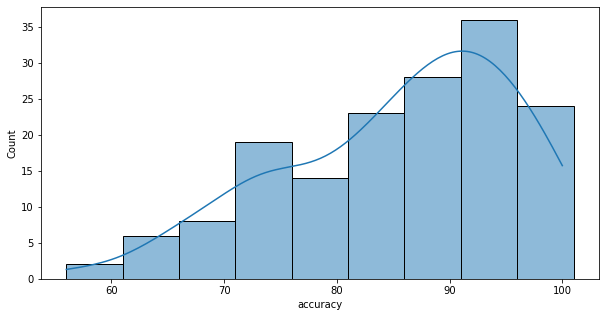

In [116]:
fig = plt.figure(figsize=(10,5))
print('mean Accuracy:%f'%data.accuracy.mean())
print('median Accuracy:%f'%data.accuracy.median())

sns.histplot(data=data,
             x='accuracy',
            binwidth=5, multiple='layer', kde=True)

media IF:3.031000


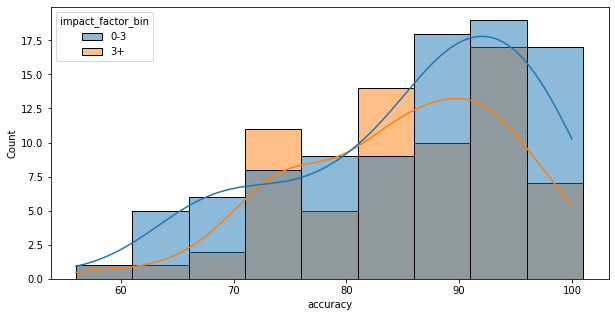

In [117]:
fig = plt.figure(figsize=(10,5))
median_if = data.impact_factor.median()
print('media IF:%f'%median_if)
bins = [0,median_if, np.inf]
names = ['0-%d'%median_if, '%d+'%median_if]
data['impact_factor_bin'] = pd.cut(data.impact_factor, 
                                   bins, 
                                   labels=names,
                                   include_lowest=True)

sns.histplot(data=data,
             x='accuracy',
             hue='impact_factor_bin',             
            binwidth=5, multiple='layer', kde=True)



median :33.333333
percent_cs_authors_bin
0-33     40
33-99    36
Name: accuracy, dtype: int64


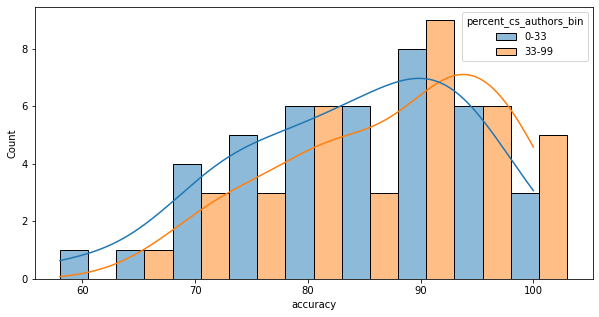

In [118]:
fig = plt.figure(figsize=(10,5))
median_percent = data[data['percent_cs_authors']<100]['percent_cs_authors'].median()
print('median :%f'%median_percent)
bins = [0,median_percent,99]
names = ['0-%d'%median_percent,'%d-99'%median_percent]
data['percent_cs_authors_bin'] = pd.cut(data[data['percent_cs_authors']<100]['percent_cs_authors'],
                                bins,
                                labels=names,
                               include_lowest=True)
print(data[data['percent_cs_authors']<100].groupby(['percent_cs_authors_bin']).accuracy.count())

sns.histplot(data=data,
             x='accuracy',
             hue='percent_cs_authors_bin',             
            binwidth=5, multiple='dodge', kde=True)

full
cs       84
mixed    51
neuro    25
Name: accuracy, dtype: int64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

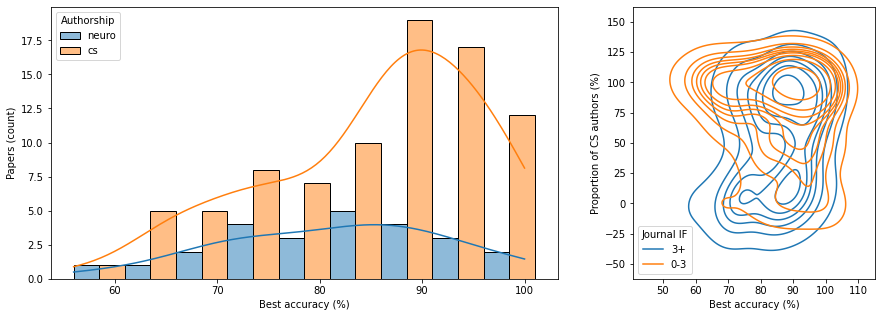

In [119]:
fig = plt.figure(figsize=(20,5))

data['full']='mixed'
data.loc[data['percent_cs_authors']==100,'full']='cs'
data.loc[data['percent_cs_authors']==0,'full']='neuro'

print(data.groupby(['full']).accuracy.count())
ax=plt.subplot(121)
ax=sns.histplot(data=data,
             x='accuracy',
             hue='full', hue_order=['neuro','cs'],#stat='probability',common_norm=False,
            binwidth=5, multiple='dodge', kde=True)
ax.legend_._set_loc(2)
ax.legend_.set_title('Authorship')
ax.set_xlabel('Best accuracy (%)')
ax.set_ylabel('Papers (count)')

plt.subplot(143)
ax=sns.kdeplot(data=data,
            x='accuracy',
            y='percent_cs_authors',
            #y='impact_factor',
            hue='impact_factor_bin',hue_order=['3+','0-3'],
            #hue='full',hue_order=['neuro','cs'],
            alpha=1,levels=10, #thresh=0.1,           
            fill=False)
ax.legend_._set_loc(3)
ax.legend_.set_title('Journal IF')
ax.set_xlabel('Best accuracy (%)')
ax.set_ylabel('Proportion of CS authors (%)')

plt.savefig('./pics/accuracy_authorship.eps', format='eps', dpi=600, transparent=True)

## EEG Preprocessing & artifact handling 

In [120]:
# use only papers where preprocessing was annotated
pre_proc = data['eeg_preprocessing'].dropna().reset_index()
# rename preprocessing as true/false
pre_proc.loc[pre_proc.eeg_preprocessing=='NS','eeg_preprocessing'] = False
pre_proc.loc[pre_proc.eeg_preprocessing != False, 'eeg_preprocessing'] = True


In [121]:
pre_proc.groupby('eeg_preprocessing').count()

,index
eeg_preprocessing,
False,21
True,124


In [122]:
# use only papers where preprocessing was annotated
artefact = data['artifact_handling'].dropna().reset_index()
# rename preprocessing as true/false
artefact.loc[artefact.artifact_handling=='NS','artifact_handling'] = False
artefact.loc[artefact.artifact_handling != False, 'artifact_handling'] = True


In [123]:
artefact.groupby('artifact_handling').count()

,index
artifact_handling,
False,63
True,82


## Researchers' degree of freedoms

### Hyperparameters

In [124]:
data['hyper_optimized'].unique()

array(['No', 'Gridsearch', 'Toolbox', 'Kernel autoscaling', 'Yes',
       'Trial/error', 'Previous work', 'Genetic algorithm',
       'LOPO-CV+gridsearch', 'Line search', 'Bayesian', 'Particle Swarm',
       'Gridsearch (nested)', 'Yes (NS)', 'Maximum likelihood',
       'Gradient ascent (sigma only)', 'Linesearch'], dtype=object)

In [125]:
# 'no' is in fact 'unknown'
def rename_optim(row):
    if row.hyper_optimized=='No':  
        return "unknown"
    else:
        return "yes"
data['hyper_optimized'] = data.apply(lambda row: rename_optim(row), axis=1) 


In [126]:
# hyperparameters given or not
data['hyper_given']='yes'
data.loc[data.hyper_values=='NS','hyper_given']='no'
data.groupby(['hyper_optimized','hyper_given'])['first_author'].count()

hyper_optimized  hyper_given
unknown          no             100
                 yes             24
yes              no              35
                 yes             17
Name: first_author, dtype: int64

In [127]:
def recode_hyper(row): 
    if (row.hyper_optimized=='unknown'):
        if row.hyper_given=='no':
            return 'unknown, not given'
        if row.hyper_given=='yes':
            return 'unknown, given'
    if (row.hyper_optimized=='yes'):
        if row.hyper_given=='no':
            return 'optimized, not given'
        if row.hyper_given=='yes':
            return 'optimized, given'      
        
data['hyper_quality']=data.apply(lambda row: recode_hyper(row), axis=1)

<Figure size 1440x360 with 0 Axes>

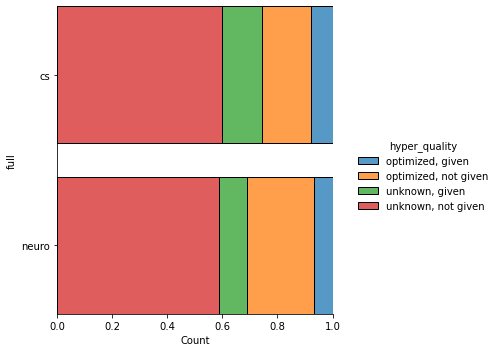

In [128]:
fig = plt.figure(figsize=(20,5))

ax=sns.displot(data=data[data.full.isin(['neuro','cs'])],
             y='full',
                hue='hyper_quality', hue_order=['optimized, given',
                                                'optimized, not given', 
                                                'unknown, given', 
                                                'unknown, not given'], stat='count',common_norm=True,
            binwidth=5, multiple='fill', shrink=.8)
  

plt.savefig('./pics/hyper_parameter.pdf', format='pdf', dpi=600)

### Normalisation

In [129]:
data.norm_method.unique()

array(['NS', 'Norm (-1, 1)', 'z-score', 'z-score, subject normalization',
       'Yes', 'Energy normalization', 'Norm(0, 1)', 'Z-score', '0-1',
       'min-max normalisation', 'Z-score, ACE', 'Norm (0,1)', 'Norm(0,1)',
       'min-max', 'L1 Norm'], dtype=object)

In [130]:
def rename_norm(row):
    if 'z-score' in row.norm_method.lower(): 
        return 'z-score'
    if row.norm_method=='NS':  
        return "unknown"
    else:
        # warning, some methods are unknown ("Yes"), and so potentially z-score; here we default them to "other".
        return "other"

data['normalized_method'] = data.apply(lambda row: rename_norm(row), axis=1) 

In [131]:
data.groupby(['normalized_method','norm_method']).first_author.count()

normalized_method  norm_method                   
other              0-1                                 1
                   Energy normalization                1
                   L1 Norm                             1
                   Norm (-1, 1)                        2
                   Norm (0,1)                          1
                   Norm(0, 1)                          2
                   Norm(0,1)                           2
                   Yes                                12
                   min-max                             1
                   min-max normalisation               1
unknown            NS                                126
z-score            Z-score                             7
                   Z-score, ACE                        1
                   z-score                            17
                   z-score, subject normalization      1
Name: first_author, dtype: int64

<Figure size 1440x360 with 0 Axes>

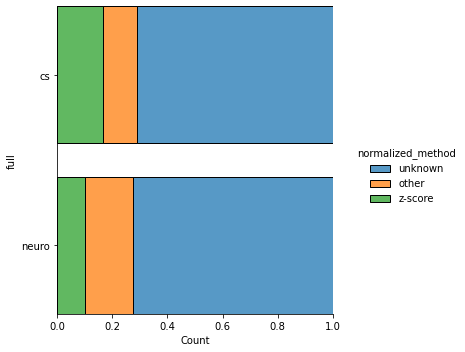

In [132]:
fig = plt.figure(figsize=(20,5))

ax=sns.displot(data=data[data.full.isin(['neuro','cs'])],
             y='full',
                hue='normalized_method', stat='count',common_norm=True,
            binwidth=5, multiple='fill', shrink=.8)
  

plt.savefig('./pics/normalization.pdf', format='pdf', dpi=600)

### Cross validation

In [134]:
data['cross_validation'].unique()

array(['NS', '10', 'LOSO', '5', 'LOO', 'k', '2', '4', '3', '20', 'nested',
       '8', '0', nan, '6', '30', 'sliding blocks'], dtype=object)

In [137]:
# rename types of cross_validation
def rename_cv(row):
    if row.cross_validation.lower()=='k': 
        return 'k-fold'
    if row.cross_validation.lower().isdigit(): 
        return 'k-fold'
    if row.cross_validation=='NS':  
        return "unknown"
    if row.cross_validation=='LOO':  
        return "LOO"
    if row.cross_validation=='LOSO':  
        return "LOSO"
    else:
        return "other"

data['cross_validation'] = data.dropna(subset=['cross_validation']).apply(lambda row: rename_cv(row), axis=1) 

In [138]:
data.groupby(['cross_validation']).first_author.count()

cross_validation
LOO         15
LOSO        13
k-fold     116
other        3
unknown     27
Name: first_author, dtype: int64

<Figure size 1440x360 with 0 Axes>

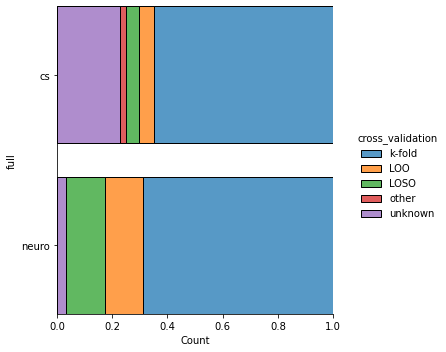

In [139]:
fig = plt.figure(figsize=(20,5))

ax=sns.displot(data=data[data.full.isin(['neuro','cs'])],
             y='full',
                hue='cross_validation', 
               hue_order=['k-fold','LOO','LOSO','other','unknown'],
               stat='count',common_norm=True,
            binwidth=5, multiple='fill', shrink=.8)
  

plt.savefig('./pics/cross_validation.pdf', format='pdf', dpi=600)

## Sample size

In [140]:
data.within_between.unique()

array(['Inter', 'Intra', nan, 'Intra, Inter, Combination', 'All',
       'Intra/All'], dtype=object)

In [141]:
data[data.within_between.isin(['Intra','Inter'])].groupby('within_between').first_author.count()

within_between
Inter    39
Intra    70
Name: first_author, dtype: int64

### within-subject studies

In [142]:
within_df = data[data.within_between == 'Intra']
# coerce to numeric
within_df.nb_samples = pd.to_numeric(within_df.nb_samples, errors='coerce')

c:\users\aucouturier\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


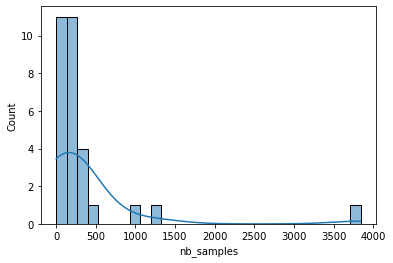

In [143]:
sns.histplot(within_df.nb_samples, kde=True)

In [144]:
# remove outlier data
within_df = within_df[within_df.nb_samples<500]

In [145]:
within_df.nb_samples.describe()

count     27.000000
mean     161.851852
std      110.824082
min        1.000000
25%       50.000000
50%      200.000000
75%      220.000000
max      450.000000
Name: nb_samples, dtype: float64

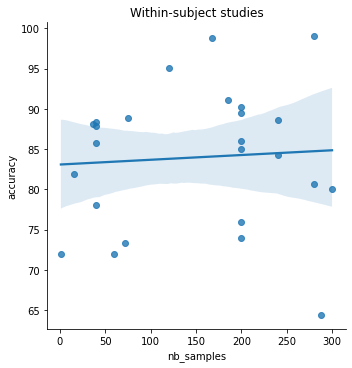

In [146]:
sns.lmplot(data=within_df,
           x='nb_samples',
          y='accuracy')
plt.title('Within-subject studies')
plt.savefig('./pics/within-subject.jpg',bbox_inches='tight')

In [147]:
lm = pg.linear_regression(within_df.nb_samples, 
                          within_df.accuracy,
                         remove_na=True)

lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,83.08,3.26,25.46,0.00,0.0,-0.04,76.33,89.83
1,nb_samples,0.01,0.02,0.32,0.75,0.0,-0.04,-0.03,0.04


### between-subject studies

In [148]:
between_df = data[data.within_between == 'Inter']
# coerce to numeric
between_df.nb_subjects = pd.to_numeric(between_df.nb_subjects, errors='coerce')

c:\users\aucouturier\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [149]:
between_df.nb_subjects.unique()

array([  nan,   32.,   10.,   18.,   28.,   36.,   20.,   60.,   44.,
        118.,  265.,   26.,  348.,  220.,  169.,   17., 1889.,   34.,
         12.,   50.,   23.,   70.,    8.,   84.,  101.,   24.])

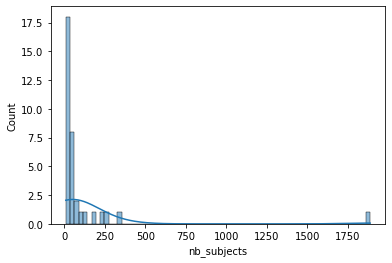

In [150]:
sns.histplot(between_df.nb_subjects, kde=True)

In [151]:
# remove outlier data
between_df = between_df[between_df.nb_subjects<500]

In [152]:
between_df.nb_subjects.describe()

count     34.000000
mean      64.617647
std       77.027352
min        8.000000
25%       20.750000
50%       34.000000
75%       60.000000
max      348.000000
Name: nb_subjects, dtype: float64

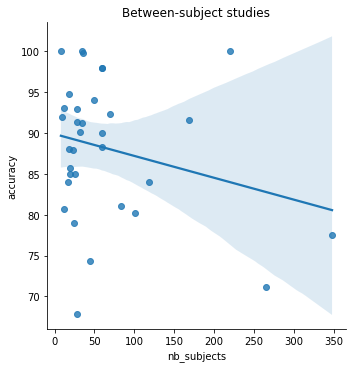

In [153]:
sns.lmplot(data=between_df,
           x='nb_subjects',
          y='accuracy')
plt.title('Between-subject studies')
plt.savefig('./pics/between-subject.jpg',bbox_inches='tight')

In [154]:
lm = pg.linear_regression(between_df.nb_subjects, 
                          between_df.accuracy,
                         remove_na=True)

lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,89.89,1.88,47.74,0.00,0.06,0.03,86.05,93.73
1,nb_subjects,-0.03,0.02,-1.43,0.16,0.06,0.03,-0.06,0.01
